# Análise exploratória de dados

## 1. Descrição dos dados

"Orange Quality Analysis Dataset" é um conjunto de dados que tem como objetivo descrever a qualidade de laranjas incluindo informações importantes sobre tamanho, peso, doçura, acidez, maciez, tempo de colheita, maturação, cor, variedade, presença de manchas e qualidade geral das frutas analisadas.
Contendo atributos numéricos e categóricos, o conjunto de dados é ideal para explorar modelos de aprendizado de máquina que podem prever ou classificar a qualidade das laranjas com base em suas propriedades físicas e químicas.

### 1.1. Leitura do conjunto de dados

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [19]:
colors = ["#20B2AA", "#B22028"]
sns.set_theme(style="whitegrid")
sns.set_palette(sns.color_palette(colors))

In [20]:
caminho = '../data/raw/Orange_Quality_Data.csv'
laranjas = pd.read_csv(caminho) #Obtendo o dataset

laranjas

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N),Quality (1-5)
0,7.5,180,12.0,3.2,2.0,10,4.0,Orange,Valencia,N,4.0
1,8.2,220,10.5,3.4,3.0,14,4.5,Deep Orange,Navel,N,4.5
2,6.8,150,14.0,3.0,1.0,7,5.0,Light Orange,Cara Cara,N,5.0
3,9.0,250,8.5,3.8,4.0,21,3.5,Orange-Red,Blood Orange,N,3.5
4,8.5,210,11.5,3.3,2.5,12,5.0,Orange,Hamlin,Y (Minor),4.5
...,...,...,...,...,...,...,...,...,...,...,...
236,8.0,194,10.9,3.6,5.0,13,1.0,Orange-Red,Tangerine,Y (Scars),5.0
237,7.4,275,8.5,3.5,5.0,20,5.0,Light Orange,Minneola (Hybrid),N,4.0
238,7.5,196,15.7,3.0,3.0,13,3.0,Deep Orange,Temple,Y (Minor Insect Damage),5.0
239,7.2,251,9.8,4.3,3.0,23,1.0,Light Orange,Moro (Blood),Y (Minor Insect Damage),3.0


### 1.2. Dicionário de dados

In [21]:
caminho_dic = '../data/external/dicionario.csv'
dicionario = pd.read_csv(caminho_dic) #Obtendo o dataset

dicionario

,variavel,descrição,tipo,subtipo
0,Size,Tamanho da fruta em cm,Quantitativa,Contínua
1,Weight,Peso da fruta em g,Quantitativa,Contínua
2,Brix,Nível de doçura,Quantitativa,Contínua
3,pH,Nível de acidez em pH,Quantitativa,Contínua
4,Softness,Maciez de 1-5,Qualitativa,Ordinal
5,HarvestTime,Dias desde a colheita,Quantitativa,discreta
6,Ripeness,Maduração de 1-5,Qualitativa,Ordinal
7,Color,Cor da laranja,Qualitativa,Nominal
8,Variety,Variedade da laranja,Qualitativa,Nominal
9,Blemishes,Defeito,Qualitativa,Nominal


---


Este dataset apresenta .....

## 2. Perguntas de partida e hipóteses

(perguntas de partida de hipótese
- Qual a relação da maduração com o tempo de colheita?

- Qual é a relação do tipo de laranja com a doçura?

- Existe alguma relação de tamanho com maciez e doçura?

- As laranjas mais macias são mais fáceis de ter danos?

- Existe um tipo de laranja mais resistente a danos?

- A cor tem algum tipo de influencia na qualidade da laranja?

- Que conjunto de informações fazem a qualidade da laranja ser melhor?

**Dados Faltantes**

In [22]:
laranjas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Size (cm)           241 non-null    float64
 1   Weight (g)          241 non-null    int64  
 2   Brix (Sweetness)    241 non-null    float64
 3   pH (Acidity)        241 non-null    float64
 4   Softness (1-5)      241 non-null    float64
 5   HarvestTime (days)  241 non-null    int64  
 6   Ripeness (1-5)      241 non-null    float64
 7   Color               241 non-null    object 
 8   Variety             241 non-null    object 
 9   Blemishes (Y/N)     241 non-null    object 
 10  Quality (1-5)       241 non-null    float64
dtypes: float64(6), int64(2), object(3)
memory usage: 20.8+ KB


In [23]:
qtd_nulos = laranjas.isnull().sum()
qtd_nulos

Size (cm)             0
Weight (g)            0
Brix (Sweetness)      0
pH (Acidity)          0
Softness (1-5)        0
HarvestTime (days)    0
Ripeness (1-5)        0
Color                 0
Variety               0
Blemishes (Y/N)       0
Quality (1-5)         0
dtype: int64

dessa forma podemos concluir que não há dados faltantes nesse conjunto de dados.

**Distribuição dos dados (variável por variável)**

In [24]:
laranjas.describe(include='all')

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N),Quality (1-5)
count,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241,241,241,241.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,24,12,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Deep Orange,Cara Cara,N,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75,21,149,NaN
mean,7.844813,205.128631,10.907884,3.473900,3.072614,15.344398,3.599585,NaN,NaN,NaN,3.817427
std,1.086002,56.461012,2.760446,0.421007,1.323630,5.323852,1.205214,NaN,NaN,NaN,1.014410
min,6.000000,100.000000,5.500000,2.800000,1.000000,4.000000,1.000000,NaN,NaN,NaN,1.000000
25%,6.900000,155.000000,8.500000,3.200000,2.000000,11.000000,3.000000,NaN,NaN,NaN,3.000000
50%,7.800000,205.000000,11.000000,3.400000,3.000000,15.000000,4.000000,NaN,NaN,NaN,4.000000
75%,8.700000,252.000000,13.400000,3.800000,4.000000,20.000000,4.500000,NaN,NaN,NaN,4.500000


In [25]:
blemishes_yes = laranjas[laranjas["Blemishes (Y/N)"].str.contains("y", case=False)]

blemishes_unique = blemishes_yes["Blemishes (Y/N)"].unique()

blemishes_unique

array(['Y (Minor)', 'Y (Sunburn)', 'Y (Mold Spot)', 'Y (Bruise)',
       'Y (Split Skin)', 'Y (Sunburn Patch)', 'Y (Scars)',
       'Y (Minor Insect Damage)', 'Y (Bruising)'], dtype=object)

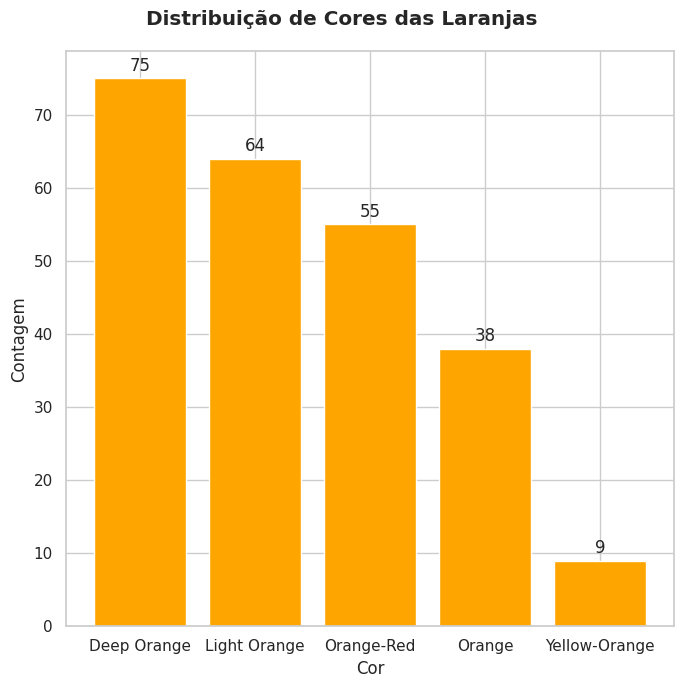

In [26]:
# Contagem de cada cor
color_counts = laranjas['Color'].value_counts()

# Plotando a distribuição das cores
plt.figure(figsize=(7,7))
plt.suptitle('Distribuição de Cores das Laranjas', fontweight='bold')

# Gráfico de barras
bars = plt.bar(color_counts.index, color_counts.values, color='orange')

# Adicionando rótulos
plt.xlabel('Cor')
plt.ylabel('Contagem')

# Adicionando os valores acima de cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', va='bottom')

plt.tight_layout()

# Exibindo o gráfico
plt.show()

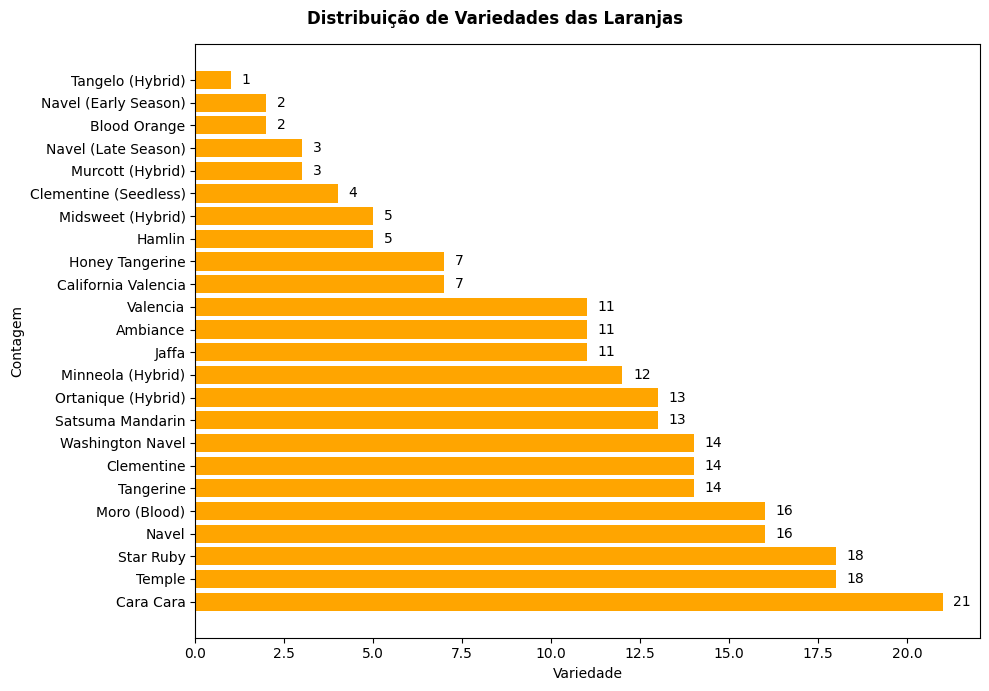

In [29]:
# Contagem de cada Variedade de laranja
variety_counts = laranjas['Variety'].value_counts()

# Plotando a distribuição das variedades
plt.figure(figsize=(10,7))
plt.suptitle('Distribuição de Variedades das Laranjas', fontweight='bold')

# Gráfico de barras
bars = plt.barh(variety_counts.index, variety_counts.values, color='orange')

# Adicionando rótulos
plt.xlabel('Variedade')
plt.ylabel('Contagem')

# Adicionando os valores acima de cada barra
for bar in bars:
    yval = bar.get_width()
    plt.text(yval + 0.3, bar.get_y() + bar.get_height()/2, int(yval), va='center')

plt.tight_layout()

# Exibindo o gráfico
plt.show()

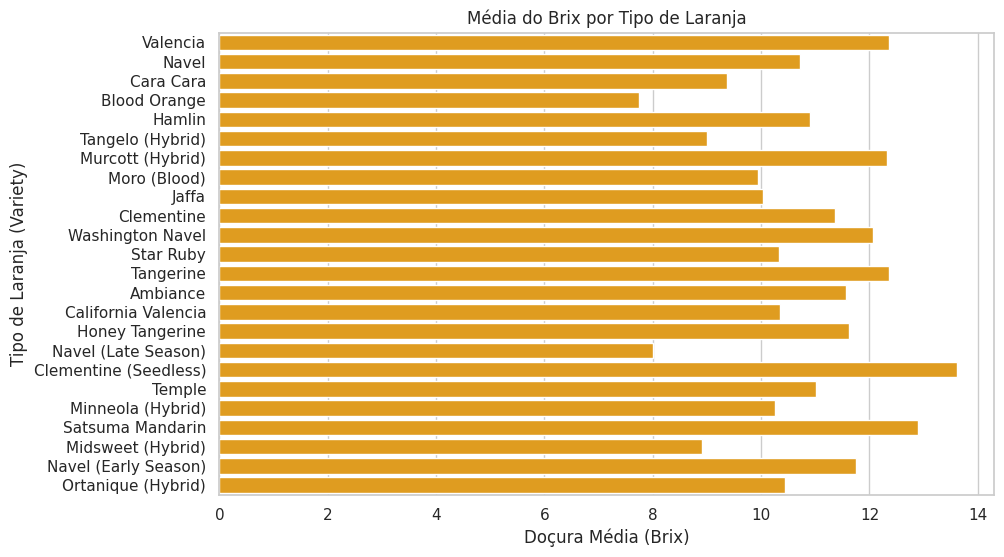

In [72]:
plt.figure(figsize=(10, 6))
sns.barplot(y='Variety', x='Brix (Sweetness)', data=laranjas, color= '#FFA500', errorbar=None)
plt.title('Média do Brix por Tipo de Laranja')
plt.ylabel('Tipo de Laranja (Variety)')
plt.xlabel('Doçura Média (Brix)')
plt.show()

- Não há tanta diferença na doçura dos diferentes tipos de laranja.
- O tipo de laraja mais doce é a Clementine, enquanto as menos doces são Blood Orange e Navel.


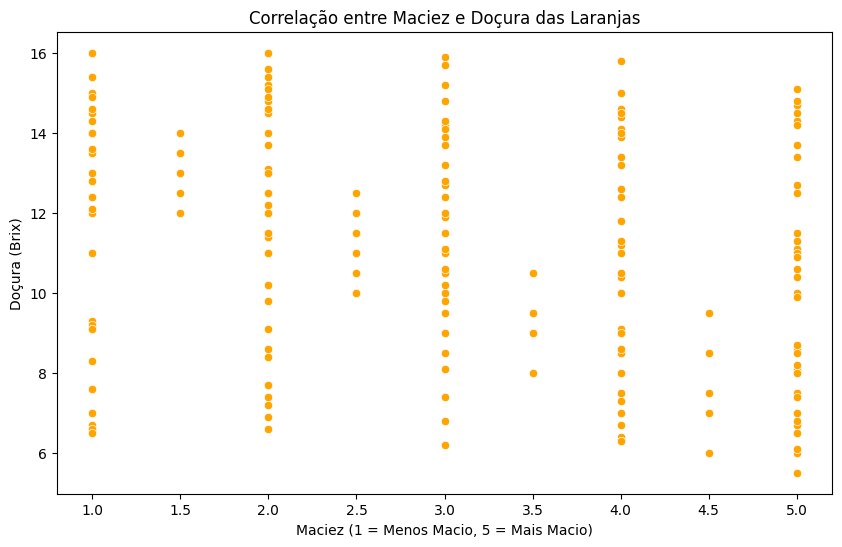

In [47]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Softness (1-5)', y='Brix (Sweetness)', data=laranjas, color='#FFA500')
plt.title('Correlação entre Maciez e Doçura das Laranjas')
plt.xlabel('Maciez (1 = Menos Macio, 5 = Mais Macio)')
plt.ylabel('Doçura (Brix)')
plt.show()

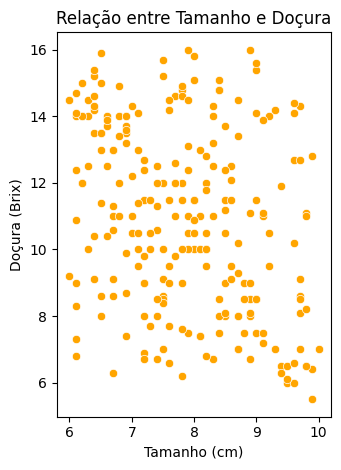

In [50]:
plt.subplot(1, 2, 2)
sns.scatterplot(x='Size (cm)', y='Brix (Sweetness)', data=laranjas, color='#FFA500')
plt.title('Relação entre Tamanho e Doçura')
plt.xlabel('Tamanho (cm)')
plt.ylabel('Doçura (Brix)')

plt.tight_layout()
plt.show()

- Não há nenhuma relação aparente entre tamanho e doçura.

Text(0, 0.5, 'Maciez (1 = Menos Macio, 5 = Mais Macio)')

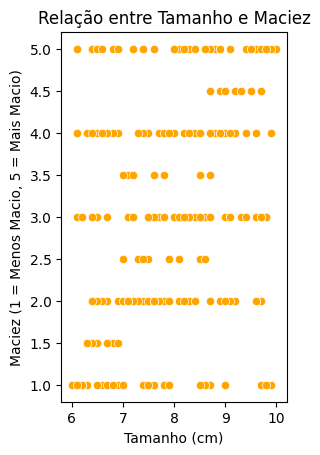

In [51]:
plt.subplot(1, 2, 1)
sns.scatterplot(x='Size (cm)', y='Softness (1-5)', data=laranjas, color='#FFA500')
plt.title('Relação entre Tamanho e Maciez')
plt.xlabel('Tamanho (cm)')
plt.ylabel('Maciez (1 = Menos Macio, 5 = Mais Macio)')

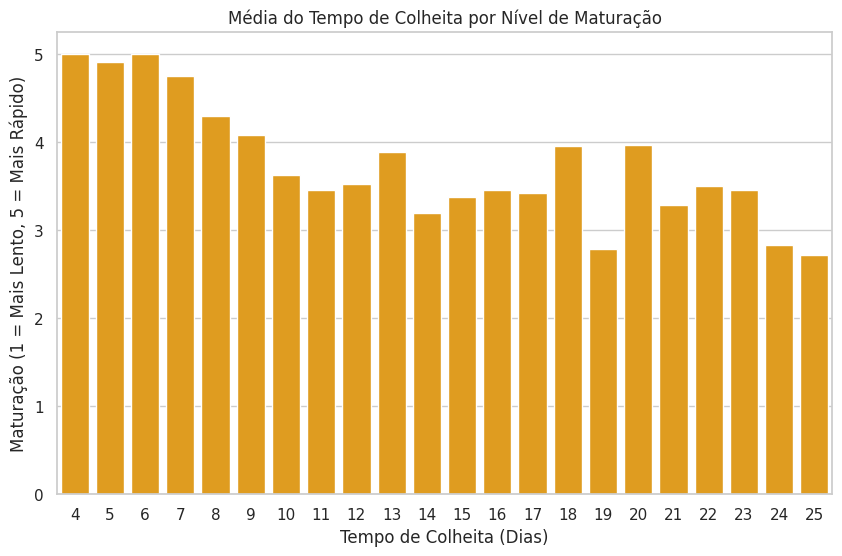

In [73]:
plt.figure(figsize=(10, 6))
sns.barplot(y='Ripeness (1-5)', x='HarvestTime (days)', data=laranjas, errorbar=None, color='#FFA500')
plt.title('Média do Tempo de Colheita por Nível de Maturação')
plt.xlabel('Tempo de Colheita (Dias)')
plt.ylabel('Maturação (1 = Mais Lento, 5 = Mais Rápido)')
plt.show()

- As laranjas com menos dias de colheita são as com maior maturação.

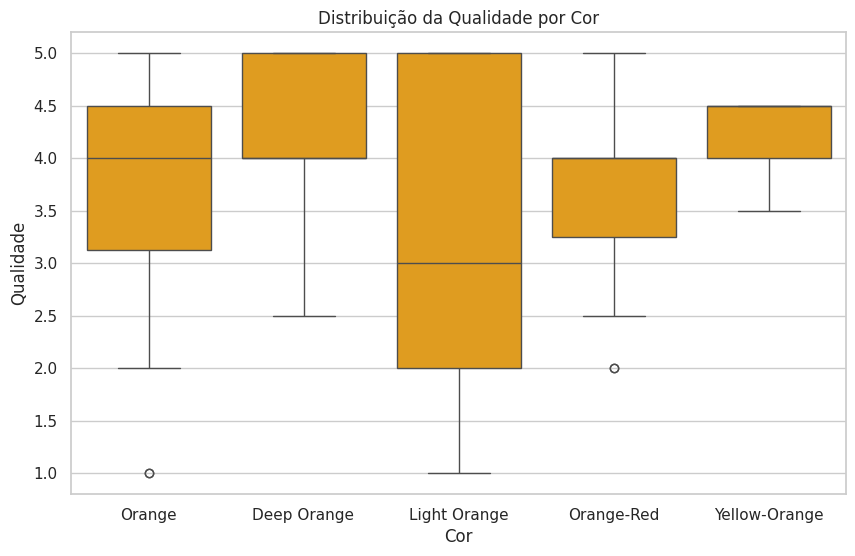

In [34]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Color', y='Quality (1-5)', data=laranjas, color='#FFA500')

plt.title('Distribuição da Qualidade das laranjas por Cor')
plt.xlabel('Cor')
plt.ylabel('Qualidade')

plt.show()

In [35]:
laranjas.corr()

/tmp/ipykernel_8186/3708610346.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  laranjas.corr()


,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Quality (1-5)
Size (cm),1.000000,0.305348,-0.305865,0.330487,0.236863,0.313330,-0.256665,-0.243113
Weight (g),0.305348,1.000000,-0.239659,0.303806,0.316806,0.374670,-0.260454,-0.330268
Brix (Sweetness),-0.305865,-0.239659,1.000000,-0.300080,-0.344376,-0.329862,0.144666,0.631343
pH (Acidity),0.330487,0.303806,-0.300080,1.000000,0.360222,0.262461,-0.232627,-0.321942
Softness (1-5),0.236863,0.316806,-0.344376,0.360222,1.000000,0.331103,-0.202404,-0.302732
HarvestTime (days),0.313330,0.374670,-0.329862,0.262461,0.331103,1.000000,-0.268691,-0.474754
Ripeness (1-5),-0.256665,-0.260454,0.144666,-0.232627,-0.202404,-0.268691,1.000000,0.280764
Quality (1-5),-0.243113,-0.330268,0.631343,-0.321942,-0.302732,-0.474754,0.280764,1.000000


/tmp/ipykernel_8186/580317537.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = laranjas.corr()


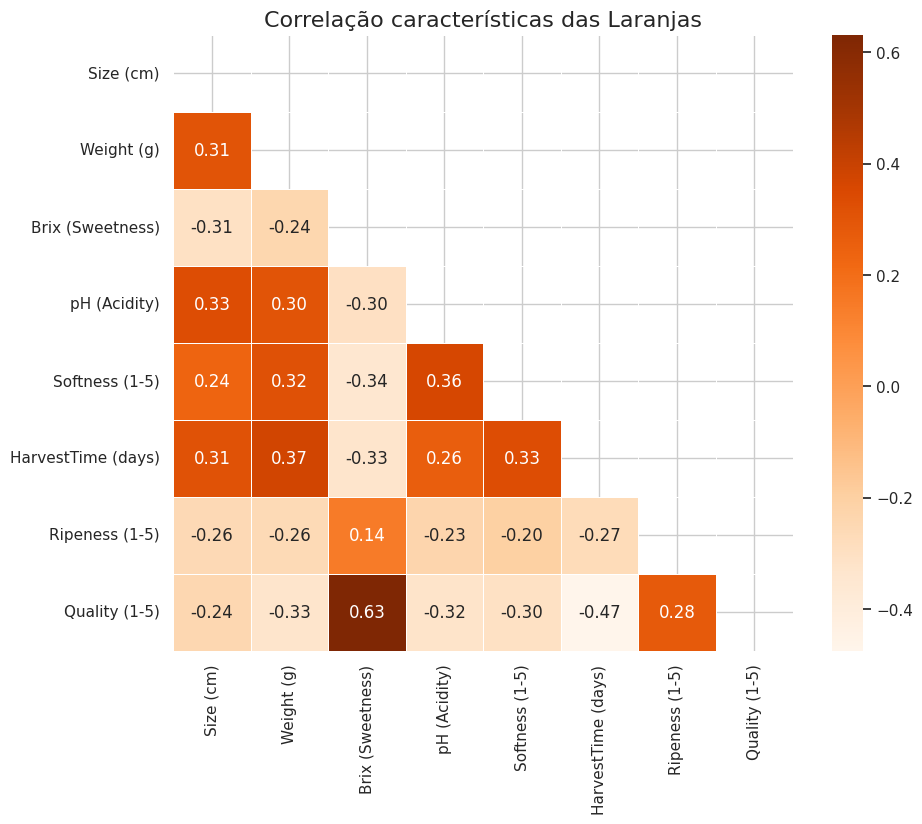

In [42]:
sns.set_theme(style="whitegrid")


caminho = '../data/raw/Orange_Quality_Data.csv'
laranjas = pd.read_csv(caminho)

correlation_matrix = laranjas.corr()

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, mask=mask, cmap='Oranges', linewidths=.5, fmt='.2f')

plt.title('Correlação características das Laranjas', fontsize=16)


plt.show()

## 3. Insights

- As laranjas com cor laranja escuro e amarelo alaranjado são as que apresentam maior qualidade.

- A variedade de laranja tem um impacto considerável na doçura. Variedades como "Clementine" são mais doces, enquanto "Blood Orange" e "Navel" são menos doces. Isso sugere que a seleção da variedade pode ser crucial para atingir um nível desejado de doçura.

- A qualidade geral das laranjas varia com base em atributos como doçura, maciez e maturação. Variedades diferentes exibem variações significativas em termos de qualidade e características físicas.

- Para melhorar a qualidade das laranjas, recomenda-se focar em variedades específicas que atendam aos critérios desejados de doçura e maciez. Além disso, otimizar o tempo de colheita pode ter um impacto positivo na maturação e qualidade da fruta.
